In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('boston_house_prices.csv')
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


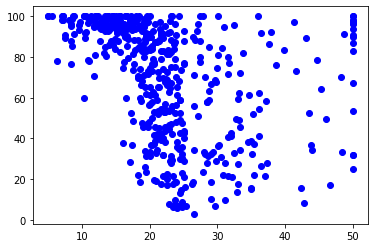

In [31]:
plt.scatter(df.MEDV, df.AGE, color="blue")

df = df[['MEDV', 'AGE']]

In [39]:
model = KMeans(n_clusters=4)
model.fit(df)
model.predict(df)
print(model.cluster_centers_)
model.labels_

df['Clus_Group'] = model.labels_

[[2.43250000e+01 5.18940000e+01 1.00000000e+00]
 [1.59588542e+01 9.47052083e+01 4.66293670e-15]
 [2.78058252e+01 2.44747573e+01 1.98058252e+00]
 [2.73963964e+01 7.93261261e+01 2.81081081e+00]]


<ipython-input-39-e0903a489e1d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clus_Group'] = model.labels_


In [38]:
df.groupby("Clus_Group").mean()

,MEDV,AGE
Clus_Group,,
0,15.895477,94.216583
1,24.220588,51.602941
2,27.980198,24.225743
3,28.287500,79.225962


   MEDV   AGE  Clus_Group
0  24.0  65.2           0
2  34.7  61.1           0
3  33.4  45.8           0
4  36.2  54.2           0
5  28.7  58.7           0
    MEDV    AGE  Clus_Group
7   27.1   96.1           1
8   16.5  100.0           1
9   18.9   85.9           1
10  15.0   94.3           1
14  18.2   84.5           1
    MEDV   AGE  Clus_Group
16  23.1  29.3           2
18  20.2  36.6           2
38  24.7  30.2           2
39  30.8  21.8           2
40  34.9  15.8           2
    MEDV   AGE  Clus_Group
1   21.6  78.9           3
6   22.9  66.6           3
11  18.9  82.9           3
17  17.5  81.7           3
19  18.2  69.5           3


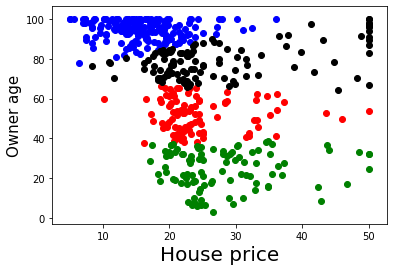

In [51]:
colorscheme = ['r', 'b', 'g', 'k']

for color, index in zip(colorscheme ,range(len(model.cluster_centers_))):
    group = (df["Clus_Group"] == index)
    new_df = df[group]
    print(new_df.head())
    plt.scatter(new_df.MEDV, new_df.AGE, color=color)

plt.xlabel("House price", fontsize=20)
plt.ylabel("Owner age", fontsize=15)
plt.show()

